In [ ]:
%%time
#necessary imports
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO
import datetime
import os

#data extraction
def upload(your_file,date,k):
    # Load the HTML file
    with open(your_file, 'r', encoding='utf-8') as file:
        html_content = file.read()

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find the table or relevant data
    tables = soup.find_all('table')

    # Wrap the first table's HTML in a StringIO object and convert it to a DataFrame
    df = pd.read_html(StringIO(str(tables[0])))[0]

    # Keep only rows 5 to 9
    df = df.iloc[5:10]

    # Reset the index if needed
    df.reset_index(drop=True, inplace=True)

    # Set the first row as the header
    df.columns = df.iloc[0]

    # Drop the first row since it's now the header
    df = df.drop(df.index[0])

    # Reset the index if needed
    df.reset_index(drop=True, inplace=True)
    df = df.drop(df.columns[0], axis=1)
    #new_columns = [f'{col}_{i+1}' for col in df.columns for i in range(df.shape[0])]
    if k==0 :
     new_columns = [f'{col}_{i+1}' for i in range(df.shape[0]) for col in df.columns]
     new_data = [df.iloc[i, :].tolist() for i in range(df.shape[0])]
     new_row = [item for sublist in new_data for item in sublist]
    elif k==1 :
     new_columns = [f'{col}_{i+4+1}' for i in range(df.shape[0]) for col in df.columns]
     new_data = [df.iloc[i, :].tolist() for i in range(df.shape[0])]
     new_row = [item for sublist in new_data for item in sublist]
    # Create a new DataFrame
    new_df = pd.DataFrame([new_row], columns=new_columns)
    new_df.index = [date]

    # Extract column names
    columns = new_df.columns

    # Split columns into prefix and suffix
    split_columns = [(col.split('_')[0], int(col.split('_')[1])) for col in columns]

    # Create a new order: group by prefix and then sort by suffix
    sorted_columns = sorted(split_columns, key=lambda x: (x[0], x[1]))

    # Reconstruct column names in new order
    new_order = [f'{prefix}_{suffix}' for prefix, suffix in sorted_columns]

    # Reorder the DataFrame columns
    new_df = new_df[new_order]

    # Return the resulting DataFrame
    return new_df


CPU times: user 610 ms, sys: 72.4 ms, total: 683 ms
Wall time: 833 ms


In [ ]:
%%time
def create(start_date,end_date,k):
  # Generate a list of dates from start_date to end_date
  date_list = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]
  # Initialize an empty dictionary to store DataFrames
  dataframes = {}
  # Loop to create and store DataFrames
  for i,date in enumerate(date_list):
  # Create a DataFrame
   df = upload(f'{i}.html',date.strftime('%d/%m/%Y'),k)
   # Store the DataFrame in the dictionary with a key
   dataframes[f'df{i}'] = df
  # List to hold the DataFrames
  df_list = []
  # Extract each DataFrame from the dictionary and append to the list
  for key, df in dataframes.items():
      df_list.append(df)
      # Concatenate all DataFrames in the list into a single DataFrame
      last_df = pd.concat(df_list, ignore_index=True)
   # Ensure the number of dates matches the number of rows in combined_df
  if len(date_list) != len(last_df):
      raise ValueError("The number of dates does not match the number of rows in the DataFrame")
   # Set the date list as the index of the combined DataFrame
  last_df.index = date_list
  return last_df

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11.4 µs


In [ ]:
os.chdir('./drive/MyDrive/project/January_r')

**Creation of Dataframe**

In [ ]:
%%time
import datetime
# Define the start and end dates
start_date = datetime.datetime.strptime('01/01/2024', '%d/%m/%Y')
end_date = datetime.datetime.strptime('31/01/2024', '%d/%m/%Y')

k=0
df_r = create(start_date,end_date,k)

CPU times: user 4.78 s, sys: 47.5 ms, total: 4.83 s
Wall time: 19.3 s


In [ ]:
df_r.head()
#1,2,3,4 represents avg,min,max and modal retail price

,Atta (Wheat)_1,Atta (Wheat)_2,Atta (Wheat)_3,Atta (Wheat)_4,Gram Dal_1,Gram Dal_2,Gram Dal_3,Gram Dal_4,Groundnut Oil (Packed)_1,Groundnut Oil (Packed)_2,...,Urad Dal_3,Urad Dal_4,Vanaspati (Packed)_1,Vanaspati (Packed)_2,Vanaspati (Packed)_3,Vanaspati (Packed)_4,Wheat_1,Wheat_2,Wheat_3,Wheat_4
2024-01-01,36.19,69,27,35,82.66,135,60,80,190.93,262,...,82,120,125.45,220,91,120,30.99,54,21,28
2024-01-02,36.17,69,27,35,82.61,133,58,80,190.64,262,...,82,120,125.55,220,90,120,30.95,62,21,28
2024-01-03,36.21,69,27,35,83.16,134,60,80,191.09,262,...,80,120,125.73,220,88,125,31.04,62,21,28
2024-01-04,36.18,69,27,35,83.08,134,58,80,191.22,262,...,80,120,125.74,220,88,120,31,62,21,28
2024-01-05,36.17,69,27,35,82.95,134,58,80,191.91,262,...,80,120,126.14,220,88,120,30.94,54,21,28


In [ ]:
%%time
os.chdir('..')
os.chdir('./January_wh')
k=1
df_wh = create(start_date,end_date,k)
df_wh.head()
#1,2,3,4 represents avg,min,max and modal retail price

CPU times: user 4.86 s, sys: 43.8 ms, total: 4.91 s
Wall time: 16.8 s


,Atta (Wheat)_5,Atta (Wheat)_6,Atta (Wheat)_7,Atta (Wheat)_8,Gram Dal_5,Gram Dal_6,Gram Dal_7,Gram Dal_8,Groundnut Oil (Packed)_5,Groundnut Oil (Packed)_6,...,Urad Dal_7,Urad Dal_8,Vanaspati (Packed)_5,Vanaspati (Packed)_6,Vanaspati (Packed)_7,Vanaspati (Packed)_8,Wheat_5,Wheat_6,Wheat_7,Wheat_8
2024-01-01,3172.88,6400,1900,3000,7307.03,13250,5300,7500,17812.05,24000,...,6400,11250,11366.54,21000,8300,11000,2754.3,4650,1700,2500
2024-01-02,3167.71,6400,1900,3000,7321.23,13250,5300,7500,17826.49,24000,...,6400,11000,11387.15,21000,8200,10500,2751.02,6000,1700,2500
2024-01-03,3165.5,6400,1900,3000,7354.16,13250,5300,7500,17828.59,24000,...,6400,11000,11396.58,21000,8200,11000,2753.56,6000,1700,3500
2024-01-04,3167.81,6400,1900,3000,7344.87,13250,5300,7500,17868.68,24000,...,6400,11000,11401.89,21000,8200,11000,2763.61,6000,1700,2550
2024-01-05,3164.01,6400,1900,3100,7339.29,13250,5200,7500,17952.52,24000,...,6400,11000,11409.79,21000,8200,11000,2757.55,4650,1700,3500


In [ ]:
%%time
commodity_list = [None] * 23  # Placeholder for commodity_list, with 23 items
commodity_list[22] = [range(4*i, 4*(i+1)) for i in range(22)]  # Example of ranges for columns

# Initialize a dictionary to store the new DataFrames
rel_dfs = {}

# Create 22 DataFrames with 4 columns each
for i in range(22):
    columns_to_select = commodity_list[22][i]  # Get the range of columns for the current DataFrame
    df_new = df_r.iloc[:, columns_to_select]  # Select the columns
    rel_dfs[f'df_{i}'] = df_new  # Store in dictionary

# Print the new DataFrames
#for key, df in rel_dfs.items():
 #   print(f"{key}:\n{df}\n")

CPU times: user 9.67 ms, sys: 0 ns, total: 9.67 ms
Wall time: 12.6 ms


In [ ]:
%%time
commodity_list = [None] * 23  # Placeholder for commodity_list, with 23 items
commodity_list[22] = [range(4*i, 4*(i+1)) for i in range(22)]  # Example of ranges for columns

# Initialize a dictionary to store the new DataFrames
wh_dfs = {}

# Create 22 DataFrames with 4 columns each
for i in range(22):
    columns_to_select = commodity_list[22][i]  # Get the range of columns for the current DataFrame
    df_new = df_wh.iloc[:, columns_to_select]  # Select the columns
    wh_dfs[f'df_{i}'] = df_new  # Store in dictionary

CPU times: user 8.15 ms, sys: 3 µs, total: 8.15 ms
Wall time: 8.16 ms


In [ ]:
%%time
# Concatenate DataFrames from rel_df and wh_df
all_dfs = {**rel_dfs, **wh_dfs}  # Combine dictionaries

# Initialize a dictionary to store concatenated DataFrames
concat_dfs = {}

# Concatenate DataFrames by matching keys
for key in all_dfs:
    if key in rel_dfs and key in wh_dfs:
        concat_dfs[key] = pd.concat([rel_dfs[key], wh_dfs[key]], axis=1)
    elif key in rel_dfs:
        concat_dfs[key] = rel_dfs[key]
    elif key in wh_dfs:
        concat_dfs[key] = wh_dfs[key]

# Print concatenated DataFrames
for key, df in concat_dfs.items():
    print(f"Concatenated DataFrame {key}:\n{df.head()}\n")

Concatenated DataFrame df_0:
           Atta (Wheat)_1 Atta (Wheat)_2 Atta (Wheat)_3 Atta (Wheat)_4  \
2024-01-01          36.19             69             27             35   
2024-01-02          36.17             69             27             35   
2024-01-03          36.21             69             27             35   
2024-01-04          36.18             69             27             35   
2024-01-05          36.17             69             27             35   

           Atta (Wheat)_5 Atta (Wheat)_6 Atta (Wheat)_7 Atta (Wheat)_8  
2024-01-01        3172.88           6400           1900           3000  
2024-01-02        3167.71           6400           1900           3000  
2024-01-03         3165.5           6400           1900           3000  
2024-01-04        3167.81           6400           1900           3000  
2024-01-05        3164.01           6400           1900           3100  

Concatenated DataFrame df_1:
           Gram Dal_1 Gram Dal_2 Gram Dal_3 Gram Dal_4 Gra

In [ ]:
%%time
# Loop through each DataFrame in the dictionary
for key, df in concat_dfs.items():
    # Convert the columns to numeric values
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coerce errors to NaN

    # Create new columns by dividing data using index
    df['Ratio_1'] = df.iloc[:, 0] / df.iloc[:, 4]  # Column1 / Column5
    df['Ratio_2'] = df.iloc[:, 1] / df.iloc[:, 5]  # Column2 / Column6
    df['Ratio_3'] = df.iloc[:, 2] / df.iloc[:, 6]  # Column3 / Column7
    df['Ratio_4'] = df.iloc[:, 3] / df.iloc[:, 7]  # Column4 / Column8

    # Print the resulting DataFrame
    print(f"DataFrame '{key}':")
    print(df.head())
    print("\n")  # Add a newline for better readability between DataFrames

DataFrame 'df_0':
            Atta (Wheat)_1  Atta (Wheat)_2  Atta (Wheat)_3  Atta (Wheat)_4  \
2024-01-01           36.19              69              27              35   
2024-01-02           36.17              69              27              35   
2024-01-03           36.21              69              27              35   
2024-01-04           36.18              69              27              35   
2024-01-05           36.17              69              27              35   

            Atta (Wheat)_5  Atta (Wheat)_6  Atta (Wheat)_7  Atta (Wheat)_8  \
2024-01-01         3172.88            6400            1900            3000   
2024-01-02         3167.71            6400            1900            3000   
2024-01-03         3165.50            6400            1900            3000   
2024-01-04         3167.81            6400            1900            3000   
2024-01-05         3164.01            6400            1900            3100   

             Ratio_1   Ratio_2   Ratio_3   R

In [ ]:
df=concat_dfs
#Choose any key and commodity from the dictionary
df=df['df_5']
price='Milk @_1'
df=df[price]/100

In [ ]:
df

,Milk @_1
2024-01-01,0.5780
2024-01-02,0.5847
2024-01-03,0.5843
2024-01-04,0.5838
2024-01-05,0.5842
2024-01-06,0.5848
2024-01-07,0.5756
2024-01-08,0.5848
2024-01-09,0.5840
2024-01-10,0.5837


**LSTM Model**

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df, WINDOW_SIZE)
X1.shape, y1.shape

((26, 5, 1), (26,))

In [ ]:
X_train1, y_train1 = X1[:20], y1[:20]
X_val1, y_val1 = X1[20:], y1[20:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape

((20, 5, 1), (20,), (6, 5, 1), (6,))

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,497 (455.07 KB)

 Trainable params: 116,497 (455.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp1 = ModelCheckpoint('model1.keras', save_best_only=True) # Added .keras extension to the filepath
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1),shuffle=False, epochs=150, callbacks=[cp1])

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.3430 - root_mean_squared_error: 0.5856 - val_loss: 0.3360 - val_root_mean_squared_error: 0.5796
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3387 - root_mean_squared_error: 0.5820 - val_loss: 0.3313 - val_root_mean_squared_error: 0.5755
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 0.3340 - root_mean_squared_error: 0.5779 - val_loss: 0.3265 - val_root_mean_squared_error: 0.5714
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 0.3291 - root_mean_squared_error: 0.5737 - val_loss: 0.3216 - val_root_mean_squared_error: 0.5671
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 0.3243 - root_mean_squared_error: 0.5695 - val_loss: 0.3168 - val_root_mean_squared_error: 0.5629
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 0.3194 - root_mean_squared_error: 0.5652 - val_loss: 0.3120 - val_root_mean_squared_error: 0.5586
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 0.314

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.keras')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


,Train Predictions,Actuals
0,0.581254,0.5848
1,0.582718,0.5756
2,0.582130,0.5848
3,0.581695,0.5840
4,0.581414,0.5837
5,0.581074,0.5853
6,0.580724,0.5837
7,0.582724,0.5859
8,0.582683,0.5749
9,0.582294,0.5900


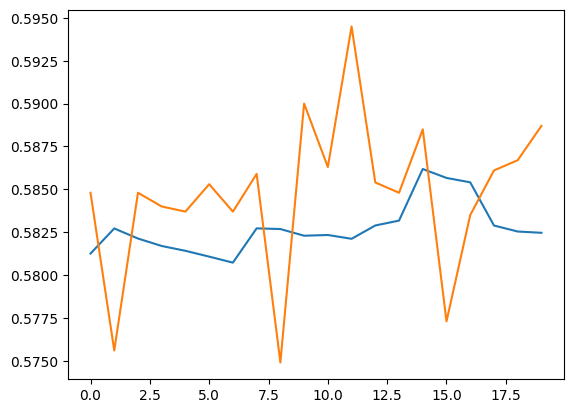

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


,Val Predictions,Actuals
0,0.581719,0.5782
1,0.583387,0.5863
2,0.583724,0.5735
3,0.582753,0.5856
4,0.581677,0.5865
5,0.580227,0.5841


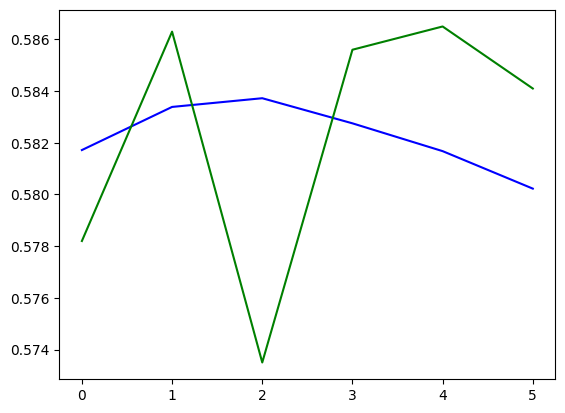

In [ ]:
plt.plot(val_results['Val Predictions'],color='blue')
plt.plot(val_results['Actuals'],color='green')

In [ ]:
recent_prices = X1[-1]
recent_prices = recent_prices.reshape((1, WINDOW_SIZE, 1))

predictions = []
for _ in range(5):
    # Predict the next value
    next_value = model1.predict(recent_prices)[0, 0]
    predictions.append(next_value)

    # Update recent_prices with the new prediction
    recent_prices = np.roll(recent_prices, shift=-1, axis=1)
    recent_prices[0, -1, 0] = next_value

print("Predictions for the next 5 values:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predictions for the next 5 values: [0.58022654, 0.5812067, 0.58018064, 0.5821987, 0.5813086]


In [ ]:
tdf=df.reset_index(drop=True)
tdf = tdf.to_frame()
#tdf = pd.DataFrame(tdf, columns=['Gram Dal_1'])
df = df.to_frame() # Convert the Series 'df' to a DataFrame.
# Now you can use rename with the columns parameter
numpy_array=predictions

# Create a new DataFrame from numpy_array
df_new = pd.DataFrame(numpy_array, columns=[price], index=pd.date_range(start='2024-01-06', periods=len(numpy_array)))

# Append new DataFrame to the existing DataFrame
tdf = pd.concat([tdf, df_new], ignore_index=True)

tdf=tdf*100


In [ ]:
a=tdf.loc[0, price]
a*=1.25

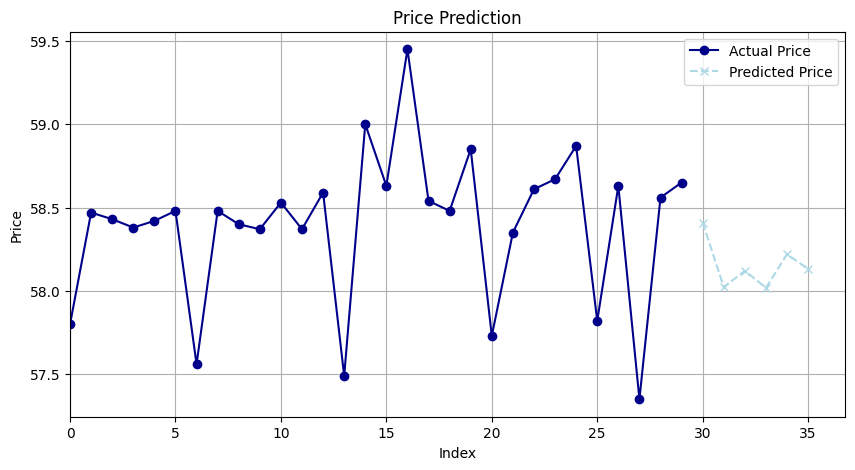

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Determine the split index
m_i = 30  # The index to split at

# Plot
plt.figure(figsize=(10, 5))

# Plot data before the threshold (index < m_i)
plt.plot(tdf.index[tdf.index < m_i], tdf[price][tdf.index < m_i], color='darkblue', marker='o', label='Actual Price')

# Plot data after the threshold (index >= m_i)
plt.plot(tdf.index[tdf.index >= m_i], tdf[price][tdf.index >= m_i], color='lightblue', marker='x', linestyle='--', label='Predicted Price')

#plt.axhline(y=a, color='red', linestyle='--', label='Threshold Line')
# Set x-axis limits to start from 0
plt.xlim(left=0)

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

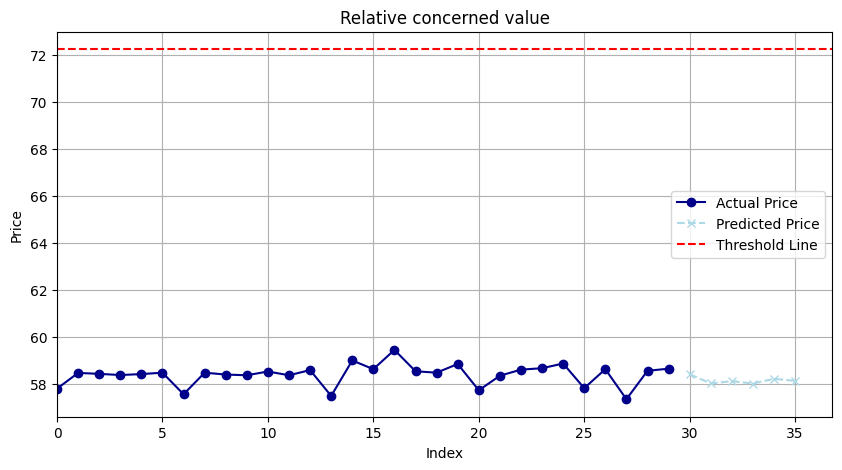

In [ ]:
# Plot
plt.figure(figsize=(10, 5))

# Plot data before the threshold (index < m_i)
plt.plot(tdf.index[tdf.index < m_i], tdf[price][tdf.index < m_i], color='darkblue', marker='o', label='Actual Price')

# Plot data after the threshold (index >= m_i)
plt.plot(tdf.index[tdf.index >= m_i], tdf[price][tdf.index >= m_i], color='lightblue', marker='x', linestyle='--', label='Predicted Price')

plt.axhline(y=a, color='red', linestyle='--', label='Threshold Line')
# Set x-axis limits to start from 0
plt.xlim(left=0)

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Relative concerned value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
os.chdir('/content')
model1.save('./drive/MyDrive/project/model1.keras')
tdf.to_csv('/content/drive/MyDrive/Colab Notebooks/Dal_1.csv', index=False)  # Save the DataFrame to a CSV file
